In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha=0.7
T=100
#t,x,y=Process(alpha,T)

In [3]:
#def Process(alpha,T):
t=np.linspace(0,T,T+1)
n=len(t)
x=np.zeros(n)
x[0]=np.random.normal(0,1)
error1=np.random.normal(0,0.5,n)
error2=np.random.normal(0,0.1,n-1)
for i in range(1,n-1):
    x[i]=alpha*x[i-1] + error1[i]
y1=x[1:]+error2
   # return t,x,y

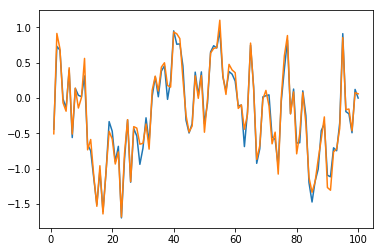

In [4]:
plt.plot(t[1:],x[1:])
plt.plot(t[1:],y1)

In [5]:
#P=np.linspaace(1,T,T)
k=[40,41,42,43,80,81,82,83]
t2=np.delete(t,k)

In [6]:
M=len(t2)
y=np.zeros(M)
error3=np.random.normal(0,0.1,M)
for i in range(1,M):
    y[i]=x[int(t2[i])]+error3[i]

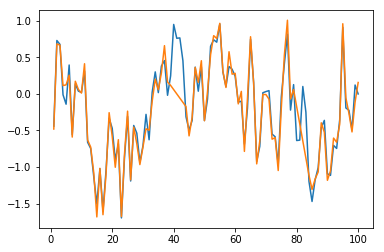

In [7]:
plt.plot(t[1:],x[1:])
plt.plot(t2[1:],y[1:])

In [16]:
def Karman(mean,alpha,sigma,h,y,r,q):
    mean_new=np.zeros(T)
    sigma_new=np.zeros(T)
    gain=np.zeros(T)
    mean_old=mean*alpha
    sigma_old=q+alpha*sigma*alpha
    I=[40,41,42,43,80,81,82,83]
    for i in range(1,T):
        if (i in I)==True:
            mean_new[i]=mean_old
            sigma_new[i]=sigma_old
            
            mean_old=alpha*mean_new[i]
            sigma_old=q**2+alpha*sigma_new[i]*alpha
        else:
            gain[i]=sigma_old*h*(h*mean_old*h+r)**(-1)
            mean_new[i]=mean_old+gain[i]*(y1[i]-h*mean_old)
            sigma_new[i]=(1-gain[i]*h)*sigma_old
            
            mean_old=alpha*mean_new[i]
            sigma_old=q**2+alpha*sigma_new[i]*alpha
    return mean_new,sigma_new, gain,mean_old
    

In [17]:
sigma=0.1
mean=0
r=0.01
q=0.05
alpha=0.7
h=1
mean_new,sigma_new, gain,mean_old=Karman(mean,alpha,sigma,h,y,r,q)

In [18]:
mean_new
#gain
#sigma_new

array([ 0.00000000e+00,  9.05575416e+00,  6.72040423e+00,  4.92899364e+00,
        3.56738508e+00,  2.54160003e+00,  1.81040794e+00,  1.27579565e+00,
        8.95647987e-01,  6.25602753e-01,  4.38798504e-01,  2.93897066e-01,
        1.89355821e-01,  9.24191461e-02, -3.57650303e-02,  2.64015504e-01,
        1.33392335e-01,  3.75535063e-02, -4.07163147e-02,  1.07309612e-01,
        1.24119670e-02, -1.94785283e-01, -8.39860396e-02,  1.07912861e-02,
       -8.17110073e-02,  4.42515471e-02, -1.97217026e-02,  4.79545125e-01,
        3.14456213e-01,  1.97456880e-01,  1.19854710e-01,  4.05589437e-02,
        3.87051513e-02,  6.20617517e-02,  4.80886462e-02,  7.54490661e-02,
        8.46633329e-02,  6.70295541e-02,  5.56253356e-02,  1.22507682e-01,
        8.57553771e-02,  6.00287640e-02,  4.20201348e-02,  2.94140943e-02,
       -5.94106198e-02,  9.01205626e-03,  1.01358013e-01,  6.70975909e-02,
        6.82342883e-02,  6.28188631e-03, -1.49939601e-03,  2.85508855e-01,
        2.08435950e-01,  

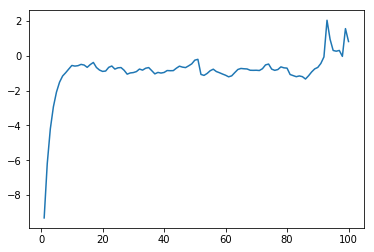

In [168]:
plt.plot(t[1:],mean_new)